### _Imports_

In [1]:
import pandas as pd
import numpy as np

from decimal import Decimal, ROUND_HALF_UP

from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pylab as plt

pd.set_option('display.max_columns', None)

## 1. Dataset Exploration

### 1.1 High-level overview

In [2]:
df = pd.read_csv('../data/Sample - Superstore.csv', encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# Nulls and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Observations:
    
- There are no nulls
- Order Date and Ship Date are in 'object' format. We need to change them to 'datetime'

In [4]:
# Changing the dates to 'datetime' data type:

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


# Checking the outcome:

#df.info()

In [5]:
# Numerical variables

df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [6]:
num_vars = list(df.describe().columns)

Observations:

- Minimum sales are 0.44$, we need to check whether it makes sense in business context
- Quantities are integers, which is a good sign
- Discount varies between 0% and 80%, this also makes sense
- Profit might be negative. This might occure when the costs are higher than sales. This can be related to high discounts. We will need to double-check the rows with negative profit later.

In [7]:
# Categorical variables

In [8]:
# Defining a function for visualization:

def cat_var(df, cols):
    '''
    Return: a Pandas dataframe object with the following columns:
        - "categorical_variable" => every categorical variable include as an input parameter (string).
        - "number_of_possible_values" => the amount of unique values that can take a given categorical variable (integer).
        - "values" => a list with the posible unique values for every categorical variable (list).

    Input parameters:
        - df -> Pandas dataframe object: a dataframe with categorical variables.
        - cols -> list object: a list with the name (string) of every categorical variable to analyse.
    '''
    cat_list = []
    for col in cols:
        cat = df[col].unique()
        cat_num = len(cat)
        cat_dict = {"categorical_variable":col,
                    "number_of_possible_values":cat_num,
                    "values":cat}
        cat_list.append(cat_dict)
    df = pd.DataFrame(cat_list).sort_values(by="number_of_possible_values", ascending=False)
    return df.reset_index(drop=True)

In [9]:
# Defining the list of categorical variables

cat_vars = [col for col in df.columns if col not in num_vars]
cat_vars

['Order ID',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name']

In [10]:
# Applying the function for visualization

df_cat_vars = cat_var(df, cat_vars)
df_cat_vars

,categorical_variable,number_of_possible_values,values
0,Order ID,5009,"[CA-2016-152156, CA-2016-138688, US-2015-10896..."
1,Product ID,1862,"[FUR-BO-10001798, FUR-CH-10000454, OFF-LA-1000..."
2,Product Name,1850,"[Bush Somerset Collection Bookcase, Hon Deluxe..."
3,Customer ID,793,"[CG-12520, DV-13045, SO-20335, BH-11710, AA-10..."
4,Customer Name,793,"[Claire Gute, Darrin Van Huff, Sean O'Donnell,..."
5,City,531,"[Henderson, Los Angeles, Fort Lauderdale, Conc..."
6,State,49,"[Kentucky, California, Florida, North Carolina..."
7,Sub-Category,17,"[Bookcases, Chairs, Labels, Tables, Storage, F..."
8,Ship Mode,4,"[Second Class, Standard Class, First Class, Sa..."
9,Region,4,"[South, West, Central, East]"


Observations:

- There are 1850 products. Product ID and Product Name don't match as we already saw in poc_normalized_data_model.ipynb.
- Customer ID and Customer Name have the same number of entries which makes sense
- The number of States is consistent

### 1.2 Deep dive categorical variables

#### _Products_

In [11]:
# Product Sub-Categories

df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

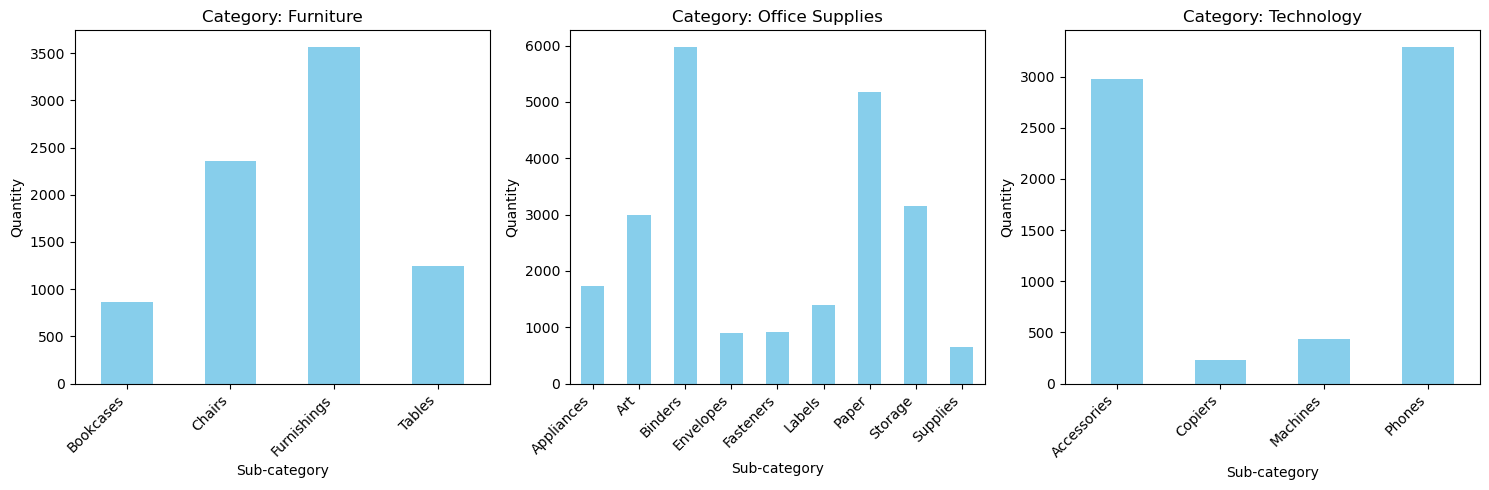

In [12]:
# Product Sub-categories by Category

categories = df['Category'].unique()

plt.figure(figsize=(15, 5))

for i, category in enumerate(categories, start=1):
    plt.subplot(1, 3, i)
    
    category_data = df[df['Category'] == category]
    
    qty_by_subcategory = category_data.groupby('Sub-Category')['Quantity'].sum()
    
    qty_by_subcategory.plot(kind='bar', color='skyblue')
    
    plt.title(f'Category: {category}')
    plt.xlabel('Sub-category')
    plt.ylabel('Quantity')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Observation: each sub-category belongs to one category

In [13]:
# Product Names by Sub-category
'''
sub_categories = df['Sub-Category'].unique()

for i, sub_category in enumerate(sub_categories, start=1):
    
    sub_category_data = df[df['Sub-Category'] == sub_category]
    
    qty_by_sub_category = sub_category_data.groupby('Product Name')['Quantity'].sum()
    
    print(sub_category, '\n', qty_by_sub_category, '\n')
'''

"\nsub_categories = df['Sub-Category'].unique()\n\nfor i, sub_category in enumerate(sub_categories, start=1):\n    \n    sub_category_data = df[df['Sub-Category'] == sub_category]\n    \n    qty_by_sub_category = sub_category_data.groupby('Product Name')['Quantity'].sum()\n    \n    print(sub_category, '\n', qty_by_sub_category, '\n')\n"

In [14]:
# Product Counts by Sub-category

sub_categories = df['Sub-Category'].unique()

sub_category_product_dict = {}

for sub_category in sub_categories:
    
    sub_category_data = df[df['Sub-Category'] == sub_category]
    
    unique_products_count = sub_category_data['Product Name'].nunique()
    
    sub_category_product_dict[sub_category] = unique_products_count
    
sub_category_product_df = pd.DataFrame(list(sub_category_product_dict.items()), columns=['Sub-Category', 'Unique Products Count'])

print(sub_category_product_df)

   Sub-Category  Unique Products Count
0     Bookcases                     50
1        Chairs                     88
2        Labels                     70
3        Tables                     56
4       Storage                    132
5   Furnishings                    186
6           Art                    157
7        Phones                    189
8       Binders                    211
9    Appliances                     97
10        Paper                    277
11  Accessories                    147
12    Envelopes                     44
13    Fasteners                     34
14     Supplies                     36
15     Machines                     63
16      Copiers                     13


Additionally, lets investigate whether Product Categories are linked to Customer Segment.

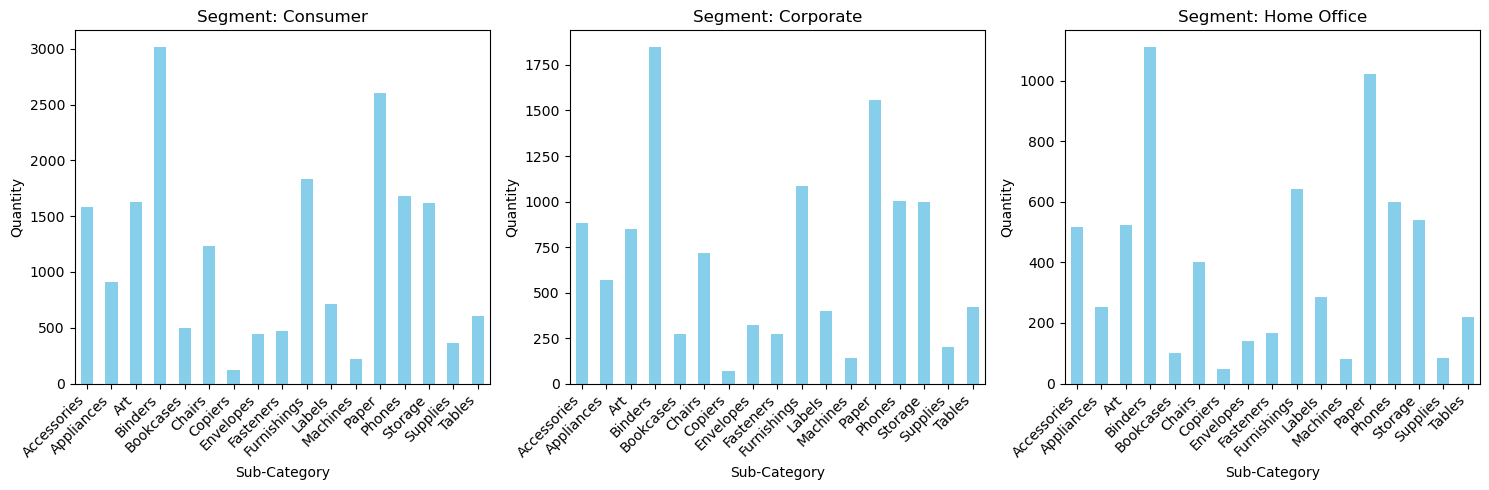

In [15]:
# Product Category by Segment

segments = df['Segment'].unique()

plt.figure(figsize=(15, 5))

for i, segment in enumerate(segments, start=1):
    plt.subplot(1, 3, i)
    
    segment_data = df[df['Segment'] == segment]
    
    qty_by_segment = segment_data.groupby('Sub-Category')['Quantity'].sum()
    
    qty_by_segment.plot(kind='bar', color='skyblue')
    
    plt.title(f'Segment: {segment}')
    plt.xlabel('Sub-Category')
    plt.ylabel('Quantity')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Observation: each Segment buys full product portfolio. The distribution by product sub-category is very similar across Segments, which might indicate that this data is syntetic.

#### _Shipping Mode_

Now lets understand what is the meaning of the variables Ship Mode. For this we will calculate **shipping days** as difference between Order Date and Ship Date.

In [16]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [17]:
df['Shipping Days'] = df['Ship Date'] - df['Order Date']

df['Shipping Days'] = df['Shipping Days'].dt.days

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Days
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7


In [18]:
df['Shipping Days'].unique()

array([3, 4, 7, 5, 2, 6, 1, 0])

In [19]:
# Overview of product Sub-categories and Product Counts

ship_mode = df['Ship Mode'].unique()

ship_mode_dict = {}

for i in ship_mode:
    
    ship_mode_data = df[df['Ship Mode'] == i]
    
    ship_days = ship_mode_data['Shipping Days'].unique()
    
    ship_mode_dict[i] = ship_days
    
ship_mode_df = pd.DataFrame(list(ship_mode_dict.items()), columns=['Ship Mode', 'Shipping Days'])

In [20]:
ship_mode_df

,Ship Mode,Shipping Days
0,Second Class,"[3, 4, 2, 5, 1]"
1,Standard Class,"[7, 5, 4, 6, 3]"
2,First Class,"[2, 1, 3, 4]"
3,Same Day,"[0, 1]"


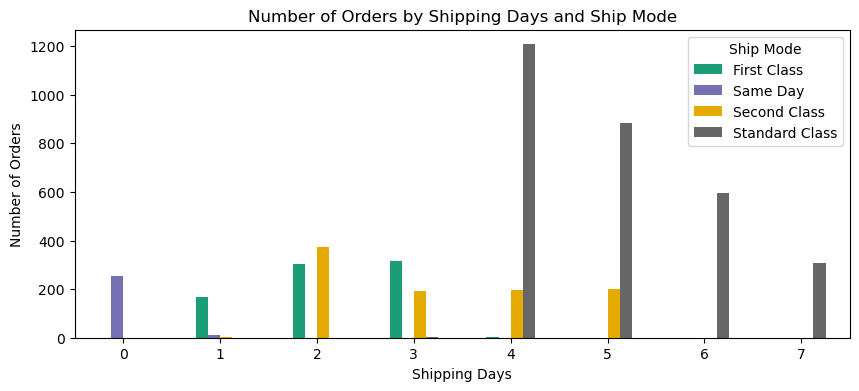

In [21]:
# Number of orders by ship mode and shipping days

order_counts = df.groupby(['Ship Mode', 'Shipping Days'])['Order ID'].nunique().reset_index()

order_counts_pivot = order_counts.pivot(index='Shipping Days', columns='Ship Mode', values='Order ID')

order_counts_pivot.plot(kind='bar', figsize=(10, 4), cmap='Dark2')

plt.title('Number of Orders by Shipping Days and Ship Mode')
plt.xlabel('Shipping Days')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.legend(title='Ship Mode')

plt.show()

CONCLUSION: Shipping days by ship mode

- Same Day: 0 days
- First Class: 1-3 days
- Second Class: 2-5 days
- Standard Class: 4-7 days

Note: there is a small number of orders that doesn't follow these rules, but it might be because of the way how we calculate shipping days. Since we don't have precise order time, it might be, for example, that the order with 'Same Day' ship mode is placed today in the evening and shipped within the next 24 hours, which is the day after. In that case our feature 'Shipping Days' will be 1, but the order has been shipped in time.

### 1.3 Deep dive numerical variables

#### _Sales Value_

In this dataset Sales value is after applying the discount. Let's check whether Sales minor than 1$ make sense.

In [22]:
check_sales = df[df['Sales'] <= 1]
check_sales

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Days
2106,2107,US-2014-152723,2014-09-26,2014-09-26,Same Day,HG-14965,Henry Goldwyn,Corporate,United States,Mesquite,Texas,75150,Central,OFF-BI-10003460,Office Supplies,Binders,Acco 3-Hole Punch,0.876,1,0.8,-1.4016,0
2761,2762,CA-2017-126536,2017-10-12,2017-10-14,First Class,NK-18490,Neil Knudson,Home Office,United States,San Francisco,California,94110,West,TEC-AC-10003709,Technology,Accessories,Maxell 4.7GB DVD-R 5/Pack,0.990,1,0.0,0.4356,2
4101,4102,US-2017-102288,2017-06-19,2017-06-23,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,United States,Houston,Texas,77095,Central,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,4
4711,4712,CA-2014-112403,2014-03-31,2014-03-31,Same Day,JO-15280,Jas O'Carroll,Consumer,United States,Philadelphia,Pennsylvania,19120,East,OFF-BI-10003529,Office Supplies,Binders,Avery Round Ring Poly Binders,0.852,1,0.7,-0.5964,0
7548,7549,CA-2014-103492,2014-10-10,2014-10-15,Standard Class,CM-12715,Craig Molinari,Corporate,United States,Huntsville,Texas,77340,Central,OFF-BI-10004140,Office Supplies,Binders,Avery Non-Stick Binders,0.898,1,0.8,-1.5715,5
8033,8034,CA-2015-119690,2015-06-25,2015-06-28,First Class,MV-17485,Mark Van Huff,Consumer,United States,Houston,Texas,77041,Central,OFF-BI-10000201,Office Supplies,Binders,"Avery Triangle Shaped Sheet Lifters, Black, 2/...",0.984,2,0.8,-1.4760,3
8658,8659,CA-2016-168361,2016-06-21,2016-06-25,Standard Class,KB-16600,Ken Brennan,Corporate,United States,Chicago,Illinois,60623,Central,OFF-BI-10003727,Office Supplies,Binders,Avery Durable Slant Ring Binders With Label Ho...,0.836,1,0.8,-1.3376,4
9292,9293,CA-2017-124114,2017-03-02,2017-03-02,Same Day,RS-19765,Roland Schwarz,Corporate,United States,Waco,Texas,76706,Central,OFF-BI-10004022,Office Supplies,Binders,Acco Suede Grain Vinyl Round Ring Binder,0.556,1,0.8,-0.9452,0


From this extract we see that most of the products cheaper than 1 dollar are binders. Additionally they have a big discount. Therefore the data seems correct.

Lets calculate **List Price** (before discount) and **Net Price** (after discount) to check data consistency.

In [23]:
# Creating new variables

df['List Price'] = df.apply(lambda row: row['Sales'] / (1 - row['Discount']) / row['Quantity'] if row['Discount'] != 0
                            else row['Sales'] / row['Quantity'], axis=1)

df['Net Price'] = df.apply(lambda row: row['Sales'] / row['Quantity'], axis=1)


# Applying the round half up

df['List Price'] = df['List Price'].apply(lambda x: Decimal(str(x)).quantize(Decimal('0.01'), rounding=ROUND_HALF_UP)).astype('float64')

df['Net Price'] = df['Net Price'].apply(lambda x: Decimal(str(x)).quantize(Decimal('0.01'), rounding=ROUND_HALF_UP)).astype('float64')


df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Days,List Price,Net Price
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3,130.98,130.98
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3,243.98,243.98
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4,7.31,7.31
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7,348.21,191.52
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7,13.98,11.18


#### _Profit_

Lets calculate other financial metrics: **Cost of Goods Sold (COGS)** and **Gross Margin**, and then check data consistency.

In [24]:
# Creating new variables

df['COGS'] = df.apply(lambda row: (row['Sales'] - row['Profit']) / row['Quantity'], axis=1)

df['COGS'] = df['COGS'].apply(lambda x: Decimal(str(x)).quantize(Decimal('0.01'), rounding=ROUND_HALF_UP)).astype('float64')



df['Gross Margin'] = df.apply(lambda row: (row['List Price'] - row['COGS']) / row['List Price'], axis=1)

df['Gross Margin'] = df['Gross Margin'].apply(lambda x: Decimal(str(x)).quantize(Decimal('0.01'), rounding=ROUND_HALF_UP)).astype('float64')


df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Days,List Price,Net Price,COGS,Gross Margin
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3,130.98,130.98,110.02,0.16
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3,243.98,243.98,170.79,0.30
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4,7.31,7.31,3.87,0.47
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7,348.21,191.52,268.12,0.23
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7,13.98,11.18,9.93,0.29


In [25]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Days,List Price,Net Price,COGS,Gross Margin
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896,3.958175,75.571127,60.918954,53.119865,0.341016
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000,0.990000,0.340000,0.540000,0.000000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750,3.000000,6.480000,5.470000,3.470000,0.260000
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500,4.000000,19.980000,16.270000,12.930000,0.340000
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000,5.000000,76.980000,63.940000,54.520000,0.470000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000,7.000000,7546.160000,3773.080000,4074.930000,0.500000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108,1.747567,188.961461,142.927479,122.251161,0.135602


Lets see whether negative profit makes sense

In [26]:
# Filter df by records with negative profit

check_profit = df[df['Profit'] < 0]

# Create a new column indicating whether COGS is higher than Net Price. This can explain negative profit

check_profit['Is COGS > Net Price'] = check_profit['COGS'] > check_profit['Net Price']

# See how many cases are True or False

check_profit['Is COGS > Net Price'].value_counts()

C:\Users\Kristina\AppData\Local\Temp\ipykernel_8224\1224369396.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_profit['Is COGS > Net Price'] = check_profit['COGS'] > check_profit['Net Price']


Is COGS > Net Price
True    1871
Name: count, dtype: int64

This confirms that there is negative profit due to higher COGS than Net Price. Lets see if it is due to discounts.

In [27]:
# Checking minimum and maximum discounts

min = check_profit['Discount'].min()
max = check_profit['Discount'].max()

print('min discount is ', min, 'and max discount is ', max)

min discount is  0.1 and max discount is  0.8


Definitively, all order items with negative profit have at least 10% of discount. To do the final check, lets see whether COGS is highter than List Price. That would be than a business problem.

In [28]:
# Create a new column indicating whether COGS is higher than List Price

check_profit['Is COGS > List Price'] = check_profit['COGS'] > check_profit['List Price']

# See how many cases are True or False

check_profit['Is COGS > List Price'].value_counts()

C:\Users\Kristina\AppData\Local\Temp\ipykernel_8224\1488480072.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_profit['Is COGS > List Price'] = check_profit['COGS'] > check_profit['List Price']


Is COGS > List Price
False    1871
Name: count, dtype: int64

Our hypothesis has been confirmed: the profit is negative when the discount brings Net Price below COGS.

### 1.4 Data Cleaning and persistance

#### _Product consistency_

In [29]:
# Checking whether list price is unique for each product

counts = df.groupby('Product ID')['List Price'].nunique()

counts.sort_values(ascending=False).head(10)

Product ID
OFF-AR-10001149    2
FUR-FU-10001473    2
FUR-FU-10004017    2
OFF-BI-10004632    2
FUR-FU-10004270    2
FUR-CH-10001146    2
FUR-FU-10004848    2
FUR-FU-10004864    2
OFF-AP-10000576    2
FUR-FU-10004091    2
Name: List Price, dtype: int64

In [30]:
check_listprice = df[df['Product ID'] == 'TEC-PH-10001795']

check_listprice.sort_values(by="Product Name")

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Days,List Price,Net Price,COGS,Gross Margin
806,807,CA-2014-134313,2014-11-01,2014-11-07,Standard Class,RA-19915,Russell Applegate,Consumer,United States,Denver,Colorado,80219,West,TEC-PH-10001795,Technology,Phones,ClearOne CHATAttach 160 - speaker phone,1983.968,4,0.2,247.9960,6,619.99,495.99,433.99,0.30
5530,5531,CA-2017-160885,2017-12-02,2017-12-06,Standard Class,JK-16090,Juliana Krohn,Consumer,United States,Omaha,Nebraska,68104,Central,TEC-PH-10001795,Technology,Phones,ClearOne CHATAttach 160 - speaker phone,2479.960,4,0.0,743.9880,4,619.99,619.99,433.99,0.30
5812,5813,US-2015-163279,2015-03-22,2015-03-26,Standard Class,JD-16150,Justin Deggeller,Corporate,United States,San Diego,California,92037,West,TEC-PH-10001795,Technology,Phones,ClearOne CHATAttach 160 - speaker phone,1487.976,3,0.2,185.9970,4,619.99,495.99,433.99,0.30
8248,8249,CA-2016-133816,2016-05-10,2016-05-13,Second Class,CS-12400,Christopher Schild,Home Office,United States,Philadelphia,Pennsylvania,19134,East,TEC-PH-10001795,Technology,Phones,ClearOne CHATAttach 160 - speaker phone,743.988,2,0.4,-123.9980,3,619.99,371.99,433.99,0.30
5513,5514,CA-2015-103177,2015-05-30,2015-06-01,First Class,EN-13780,Edward Nazzal,Consumer,United States,New York City,New York,10009,East,TEC-PH-10001795,Technology,Phones,RCA H5401RE1 DECT 6.0 4-Line Cordless Handset ...,239.970,3,0.0,2.3997,2,79.99,79.99,79.19,0.01


Observation: after checking several examples where one product has different prices, we observed that in that cases each product name has multiple product ids. This means that if we want to have a unique product identifier, we should create a combination of product id and product name.

In [32]:
# Checking whether COGS is unique for each product

counts = df.groupby('Product Name')['COGS'].nunique()

counts.sort_values(ascending=False).head(10)

Product Name
Staple envelope                                                                                       9
Staples                                                                                               9
Easy-staple paper                                                                                     8
Staples in misc. colors                                                                               7
Staple holder                                                                                         3
Staple remover                                                                                        3
Hoover Shoulder Vac Commercial Portable Vacuum                                                        2
Bush Cubix Conference Tables, Fully Assembled                                                         2
Holmes Cool Mist Humidifier for the Whole House with 8-Gallon Output per Day, Extended Life Filter    2
Global Troy Executive Leather Low-Back Tilter      

In [33]:
check_cogs = df[df['Product Name'] == 'Staple holder']

#check_cogs.sort_values(by="Product ID")

We can get similar conclusion as with List Price. Lets try to create a **primary key for product**.

In [35]:
# 1. Create encoding for product Name

label_encoder = LabelEncoder()

df['Product_encoded'] = label_encoder.fit_transform(df['Product Name'])

df['Product_encoded'] = df['Product_encoded'].astype(str).str.zfill(5) # to standarize product codes


# 2. Add product code to Product ID

df['Product PK'] = df['Product ID'] + '-' + df['Product_encoded']

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Days,List Price,Net Price,COGS,Gross Margin,Product_encoded,Product PK
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3,130.98,130.98,110.02,0.16,00386,FUR-BO-10001798-00386
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3,243.98,243.98,170.79,0.30,00839,FUR-CH-10000454-00839
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4,7.31,7.31,3.87,0.47,01433,OFF-LA-10000240-01433
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7,348.21,191.52,268.12,0.23,00366,FUR-TA-10000577-00366
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7,13.98,11.18,9.93,0.29,00573,OFF-ST-10000760-00573


In [36]:
# Checking whether COGS is unique for each product primary key

counts = df.groupby('Product PK')['List Price'].nunique()

counts.sort_values(ascending=False).head()

Product PK
TEC-PH-10004977-00725    1
FUR-BO-10000112-00380    1
FUR-BO-10000330-01421    1
FUR-BO-10000362-01429    1
FUR-BO-10000468-01181    1
Name: List Price, dtype: int64

We successfully created a unique product identifier.

**To does:** Some COGS for the same products are not equal due to roundings. We can correct this later.

#### _Fix City duplicity_

During prove of concept for normalized data model an issue has been identified with postal code 92024. The are 34 records with City _Sand Diego_ and 5 records with City _Encinitas_. This seems to be an error, so for further analysis divergent values will be replaced by the most frequent ocurrency.

In [38]:
# Checking whether Encinitas appears only under postal code 92024

check_city = df[df['City'] == 'Encinitas']

check_city

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Days,List Price,Net Price,COGS,Gross Margin,Product_encoded,Product PK
1113,1114,CA-2017-140585,2017-12-18,2017-12-23,Second Class,RA-19915,Russell Applegate,Consumer,United States,Encinitas,California,92024,West,OFF-BI-10003364,Office Supplies,Binders,Binding Machine Supplies,46.672,2,0.20,16.3352,5,29.17,23.34,15.17,0.48,00330,OFF-BI-10003364-00330
1114,1115,CA-2017-140585,2017-12-18,2017-12-23,Second Class,RA-19915,Russell Applegate,Consumer,United States,Encinitas,California,92024,West,FUR-BO-10002206,Furniture,Bookcases,"Bush Saratoga Collection 5-Shelf Bookcase, Han...",119.833,1,0.15,-12.6882,5,140.98,119.83,132.52,0.06,00385,FUR-BO-10002206-00385
1115,1116,CA-2017-140585,2017-12-18,2017-12-23,Second Class,RA-19915,Russell Applegate,Consumer,United States,Encinitas,California,92024,West,TEC-AC-10003610,Technology,Accessories,Logitech Illuminated - Keyboard,119.980,2,0.00,57.5904,5,59.99,59.99,31.19,0.48,01022,TEC-AC-10003610-01022
2819,2820,CA-2016-160500,2016-05-05,2016-05-08,First Class,DM-13015,Darrin Martin,Consumer,United States,Encinitas,California,92024,West,OFF-BI-10003784,Office Supplies,Binders,Computer Printout Index Tabs,6.720,5,0.20,2.3520,3,1.68,1.34,0.87,0.48,00462,OFF-BI-10003784-00462
2820,2821,CA-2016-160500,2016-05-05,2016-05-08,First Class,DM-13015,Darrin Martin,Consumer,United States,Encinitas,California,92024,West,FUR-TA-10003748,Furniture,Tables,Bevis 36 x 72 Conference Tables,298.776,3,0.20,7.4694,3,124.49,99.59,97.10,0.22,00317,FUR-TA-10003748-00317


In [39]:
# Replacing Encinitas by San Diego

df['City'] = df['City'].replace({'Encinitas': 'San Diego'})

**To does**: create a new feature, Gender, based on customer name.

In [40]:
# Savings updated dataset:

df.to_csv('../data/Superstore_250217.csv', index=False)

### 1.5 Data Interpretation

After this initial exploration, we have better understanding of each variable in our dataset.

| Name        | Type   | Unique Values | Description | Transformations |
|------------------|-----------------|---------------|------------------|-----------------|
| Row ID           | Numerical       | 9994 | Unique identifier for each order item |  |  |
| Order ID         | Categorical     | 5009 | Unique identifier for each order |  |  |
| Order Date       | Date            | 1237 | Date when the order was placed | Converted to datetime |  |
| Ship Date        | Date            | 1334 | Date when the order was shipped | Converted to datetime |  |
| Ship Mode        | Categorical     | 4 | Delivery time: Same Day (0 days), First Class (1-3 days), Second Class (2-5 days), Standard Class (4-7 days) |  |  |
| Customer ID      | Categorical     | 793 | Unique identifier for each customer |  |  |
| Customer Name    | Categorical     | 793 | Full name of the customer |  |  |
| Segment          | Categorical     | 3 | Market segment of the customer: Consumer, Corporate, Home Office |  |  |
| Country          | Categorical     | 1 | United States |  |  |
| City             | Categorical     | 531 | City where the order was placed | City duplicity for Postal Code 92024 fixed |  |
| State            | Categorical     | 49 | State where the order was placed |  |  |
| Postal Code      | Categorical     | 631 | Postal code where the order was placed |  |  |
| Region           | Categorical     | 4 | Region where the order was placed: South, West, Central, East |  |  |
| Product ID       | Categorical     | 1862 | Product identifier | Primary Key created as combinaton of Product ID and Product Name |  |
| Category         | Categorical     | 3 | High-level product classification: Furniture, Office Supplies, Technology |  |  |
| Sub-Category     | Categorical     | 17 | Specific classification within a category (e.g. Bookcases, Chairs, Labels, Tables, Storage, ...  |  |  |
| Product Name     | Categorical     | 1850 | Name of the product |  |  |
| Sales            | Numerical       | na | Sales amount for the product | List Price and Net Price added |  |
| Quantity         | Numerical       | na | Quantity of the product sold |  |  |
| Discount         | Numerical       | na | Discount applied to the sale |  |  |
| Profit           | Numerical       | na | Profit made on the product | COGS and Gross Margin added |  |

na = not applicable
